# Fit to a curve in a logarithmic plane

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from curvefit import *

## The data: Lux 2016
http://lux.brown.edu/LUX_dark_matter/Talks_files/LUX_NewDarkMatterSearchResult_332LiveDays_IDM2016_160721.pdf

Consider the following set of points:

<img src="./lux2016.png" width="400"/>

We use g3data (`apt-get install g3data`) to obtain

In [3]:
df=pd.read_csv('lux2016.csv')

In [4]:
df.columns

Index([u'M', u'sigma'], dtype='object')

In [5]:
x=df.columns[0]
y=df.columns[1]
df[y]=1E36*df[y]

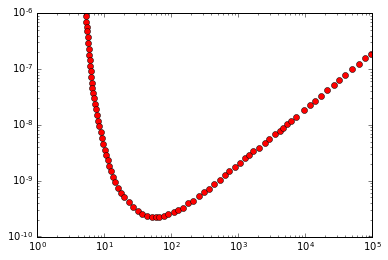

In [6]:
plt.loglog(df[x],df[y],'ro')

##  Implementation
We use a simple wraper to np.polyfit in which we intialize one object with the data points and make the polynomical fit with a  polynomial at the desired degree. Based in an alghorith by Federico von der Pahlen.

poly1d([ -0.07273834,   1.17657839,  -7.39032516,  22.54681114,
       -32.54672819,   7.94825022])

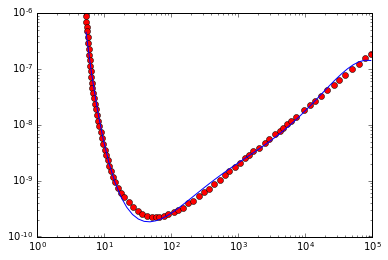

In [7]:
poly_degree=5
lux=curvefit(df[x].values,df[y].values)
lux.add_fit(poly_degree)

By trial and error:

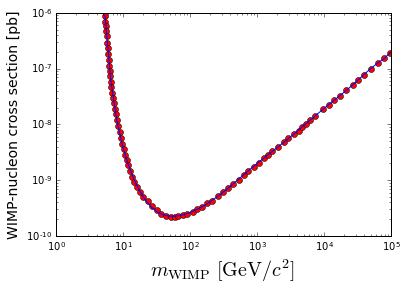

In [18]:
poly_degree=12
lux.add_fit(poly_degree)
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

## Save and recovery

In [10]:
lux.to_csv('lux2016_12.csv')

In [11]:
lux_new=curvefit()

In [12]:
lux_new.read_csv('lux2016_12.csv')

In [13]:
xlog=np.logspace( np.log10( 5 ),np.log10( 1E5 ) )

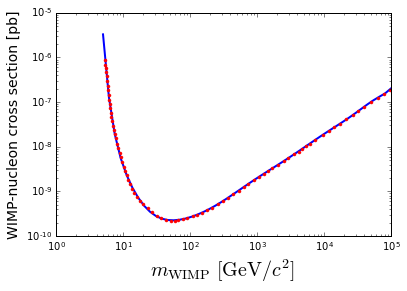

In [17]:
plt.loglog( xlog,lux_new(xlog),lw=2)                 
plt.loglog(df[x],df[y],'r.')
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

To evaluate just a point:

In [16]:
lux_new(200)

4.1404264237342956e-10

The problem is that the  extrapolation breaks rather fast

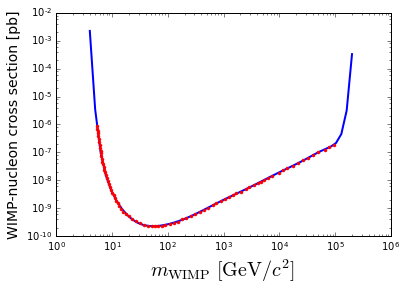

In [21]:
xlog=np.logspace( np.log10( 4 ),np.log10( 2E5 ) )
plt.loglog( xlog,lux_new(xlog),lw=2)                 
plt.loglog(df[x],df[y],'r.')
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

To avoid this problem we also implemented the possibility of a piecewise fit, by choosing the proper degree in each step
## See implementation in multi-curves:
[multicurves](./multicurvefit.ipynb)